In [ ]:
#pip install tensorflow_decision_forests

In [34]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import tensorflow_decision_forests as tfdf
import math
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

try:
  from wurlitzer import sys_pipes
except:
  from colabtools.googlelog import CaptureLog as sys_pipes

In [4]:
df_combined=pd.read_csv("/content/drive/MyDrive/Clustered_Mails_BERTopic.csv", index_col="ID")
df_combined.drop(["Unnamed: 0"],axis=1,inplace=True)
df_combined=df_combined.replace({'Status': {'Read': True, 'Unread': False}})
df_combined

,Topic,Date,Sender,Subject,EmailSize,Status,isSubscription,isEncrypted,isFlagged,AttachmentCount,AttachmentSize,isPrimaryRecipient,NoOfToValues,isCC,NoOfCCValues,isBCC
ID,,,,,,,,,,,,,,,,
A1,1,2022-03-10 09:50:34-08:00,googlecommunityteam-noreply@google.com,"Dmml, finish setting up your new Google Account",81274,True,False,False,False,0,0,True,1,False,0,False
A2,0,2022-03-11 06:46:10+11:00,DailyDigest@email.join1440.com,You're in! Here's how 1440 works...,36157,False,True,False,False,0,0,True,1,False,0,False
A5,0,2022-03-10 19:49:16+00:00,dave@davenetics.com,Verify Your Email Address for NextDraft,23484,False,False,False,False,0,0,True,1,False,0,False
A6,0,2022-03-10 19:50:00+00:00,dave@davenetics.com,NextDraft: Subscription Confirmed,23434,False,False,False,False,0,0,True,1,False,0,False
A7,0,2022-03-11 06:51:13+11:00,yo@gettheelevator.com,Welcome to ELEVATOR,29669,False,True,False,False,0,0,True,1,False,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A2109,1,2022-04-24 12:18:13-07:00,google-noreply@google.com,"Dmml, take the next step on your Windows by co...",33029,False,True,False,False,0,0,True,1,False,0,False
A2110,1,2022-04-24 19:30:49+00:00,no-reply@accounts.google.com,Critical security alert,11756,False,False,False,False,0,0,True,1,False,0,False
A2111,1,2022-04-24 12:34:10-07:00,nciarunprasath@gmail.com,Subject Line: Here’s your free [lead magnet type],5669,False,False,False,False,0,0,False,1,True,1,False


In [20]:
df_combined["Status"] = df_combined["Status"].astype(int)
df_combined["isSubscription"] = df_combined["isSubscription"].astype(int)
df_combined["isEncrypted"] = df_combined["isEncrypted"].astype(int)
df_combined["isFlagged"] = df_combined["isFlagged"].astype(int)
df_combined["isPrimaryRecipient"] = df_combined["isPrimaryRecipient"].astype(int)
df_combined["isCC"] = df_combined["isCC"].astype(int)
df_combined["isBCC"] = df_combined["isBCC"].astype(int)
df = df_combined.drop(["Date","Sender","Subject"],axis=1)
df

,Topic,EmailSize,Status,isSubscription,isEncrypted,isFlagged,AttachmentCount,AttachmentSize,isPrimaryRecipient,NoOfToValues,isCC,NoOfCCValues,isBCC
ID,,,,,,,,,,,,,
A1,1,81274,1,0,0,0,0,0,1,1,0,0,0
A2,0,36157,0,1,0,0,0,0,1,1,0,0,0
A5,0,23484,0,0,0,0,0,0,1,1,0,0,0
A6,0,23434,0,0,0,0,0,0,1,1,0,0,0
A7,0,29669,0,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
A2109,1,33029,0,1,0,0,0,0,1,1,0,0,0
A2110,1,11756,0,0,0,0,0,0,1,1,0,0,0
A2111,1,5669,0,0,0,0,0,0,0,1,1,1,0


In [21]:
X_train, X_test = train_test_split(df, test_size=0.2, 
                                   random_state=42, 
                                   stratify=df["Topic"], 
                                   shuffle=True)

In [7]:
X_train

,Topic,Date,Sender,Subject,EmailSize,Status,isSubscription,isEncrypted,isFlagged,AttachmentCount,AttachmentSize,isPrimaryRecipient,NoOfToValues,isCC,NoOfCCValues,isBCC
ID,,,,,,,,,,,,,,,,
A774,1,2022-03-31 08:33:26-07:00,nciarunprasath@gmail.com,Subject Line: (New Post) [Post title],5438,0,0,0,0,0,0,0,1,1,1,0
A1903,0,2022-04-21 15:46:55+00:00,info@atlasobscura.com,7 Unusual Courses Starting Soon,133360,0,1,0,0,0,0,1,1,0,0,0
A1352,1,2022-04-08 14:44:02-07:00,nciarunprasath@gmail.com,Subject Line: About your free consultation wit...,5380,0,0,0,0,0,0,0,1,1,1,0
A1130,1,2022-04-06 13:50:54-07:00,noemailid111@gmail.com,Subject Line: New [Lead magnet type]) [Lead ma...,5641,0,0,0,0,0,0,0,1,1,1,0
A1940,1,2022-04-21 14:43:58-07:00,nciarunprasath@gmail.com,Subject Line: It’s here! The [product name],5666,0,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A78,0,2022-03-16 20:36:41+11:00,DailyDigest@email.join1440.com,"Interest Rates, Ever Forward Stuck, and Americ...",116745,0,1,0,0,0,0,1,1,0,0,0
A446,1,2022-03-25 13:43:35-07:00,santhoshsrv45@gmail.com,Subject Line: Could you please help me out?,5480,0,0,0,0,0,0,1,1,0,0,0
A894,1,2022-04-01 06:23:26-07:00,noemailid111@gmail.com,Subject Line: Here are some things you will fi...,5356,0,0,0,0,0,0,0,1,1,1,0


In [22]:
target = "Topic"

train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(X_train, label=target, task=tfdf.keras.Task.CLASSIFICATION)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(X_test, label=target, task=tfdf.keras.Task.CLASSIFICATION)

/usr/local/lib/python3.7/dist-packages/tensorflow_decision_forests/keras/core.py:2036: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features_dataframe = dataframe.drop(label, 1)


In [23]:
# instantiate the model
model_rf = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.CLASSIFICATION)

# optional step - add evaluation metrics
model_rf.compile(metrics=["accuracy"])

# fit the model
# "sys_pipes" is optional and it enables the display of the training logs
with sys_pipes():
  model_rf.fit(x=train_ds)

Use /tmp/tmpfrk0g9nm as temporary training directory
Starting reading the dataset
1/2 [==============>...............] - ETA: 0s
Dataset read in 0:00:00.227948
Training model
Model trained in 0:00:00.597729
Compiling model


[INFO kernel.cc:1153] Loading model from path
[INFO abstract_model.cc:1063] Engine "RandomForestOptPred" built
[INFO kernel.cc:1001] Use fast generic engine


2/2 [==============================] - 1s 725ms/step


In [24]:
evaluation = model_rf.evaluate(test_ds, return_dict=True)

print(evaluation)

1/1 [==============================] - 0s 153ms/step - loss: 0.0000e+00 - accuracy: 0.8914
{'loss': 0.0, 'accuracy': 0.8914141654968262}


In [26]:
tfdf.model_plotter.plot_model_in_colab(model_rf, tree_idx=0, max_depth=4)

[TrainLog(num_trees=1, evaluation=Evaluation(num_examples=587, accuracy=0.8960817717206133, loss=3.745592412997348, rmse=None, ndcg=None, aucs=None)), TrainLog(num_trees=11, evaluation=Evaluation(num_examples=1566, accuracy=0.8933588761174968, loss=2.0642174701961675, rmse=None, ndcg=None, aucs=None)), TrainLog(num_trees=21, evaluation=Evaluation(num_examples=1580, accuracy=0.9, loss=1.4047503851825678, rmse=None, ndcg=None, aucs=None)), TrainLog(num_trees=31, evaluation=Evaluation(num_examples=1580, accuracy=0.899367088607595, loss=1.1912252791273066, rmse=None, ndcg=None, aucs=None)), TrainLog(num_trees=41, evaluation=Evaluation(num_examples=1580, accuracy=0.8981012658227848, loss=1.0610769232664305, rmse=None, ndcg=None, aucs=None)), TrainLog(num_trees=51, evaluation=Evaluation(num_examples=1580, accuracy=0.899367088607595, loss=0.9518953417533937, rmse=None, ndcg=None, aucs=None)), TrainLog(num_trees=61, evaluation=Evaluation(num_examples=1580, accuracy=0.9, loss=0.8683186749845178

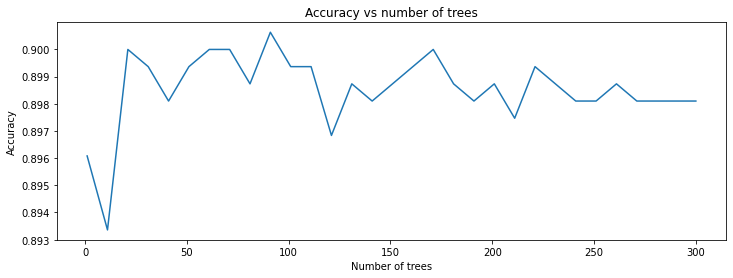

In [39]:
logs = model_rf.make_inspector().training_logs()
print(logs)
plt.figure(figsize=(12, 4))

plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")
plt.title("Accuracy vs number of trees")

plt.show()

In [ ]:
output=model_rf.predict(test_ds)
output

In [28]:
test_df=X_test.drop(['Topic'], axis=1)
test_rf=tfdf.keras.pd_dataframe_to_tf_dataset(test_df, task=tfdf.keras.Task.CLASSIFICATION)
output=model_rf.predict(test_rf)
pred=[1 if i>0.5 else 0 for i in output]

In [32]:
model_rf.make_inspector().features()

["AttachmentCount" (1; #0),
 "AttachmentSize" (1; #1),
 "EmailSize" (1; #2),
 "NoOfCCValues" (1; #3),
 "NoOfToValues" (1; #4),
 "Status" (1; #5),
 "isBCC" (1; #6),
 "isCC" (1; #7),
 "isEncrypted" (1; #8),
 "isFlagged" (1; #9),
 "isPrimaryRecipient" (1; #10),
 "isSubscription" (1; #11)]

In [30]:
model_rf.make_inspector().variable_importances()

{'MEAN_MIN_DEPTH': [("NoOfToValues" (1; #4), 8.190117240437939),
  ("isBCC" (1; #6), 8.190117240437939),
  ("isEncrypted" (1; #8), 8.190117240437939),
  ("isFlagged" (1; #9), 8.190117240437939),
  ("__LABEL" (4; #12), 8.190117240437939),
  ("AttachmentCount" (1; #0), 8.018655187350838),
  ("AttachmentSize" (1; #1), 8.000835502393015),
  ("Status" (1; #5), 7.938307126182083),
  ("isCC" (1; #7), 7.437517273318682),
  ("NoOfCCValues" (1; #3), 7.322792202391669),
  ("isPrimaryRecipient" (1; #10), 6.963634329744246),
  ("isSubscription" (1; #11), 5.880703790529286),
  ("EmailSize" (1; #2), 0.36713410275759556)],
 'NUM_AS_ROOT': [("EmailSize" (1; #2), 209.0),
  ("isSubscription" (1; #11), 76.0),
  ("isPrimaryRecipient" (1; #10), 12.0),
  ("NoOfCCValues" (1; #3), 3.0)],
 'NUM_NODES': [("EmailSize" (1; #2), 18397.0),
  ("isCC" (1; #7), 455.0),
  ("isPrimaryRecipient" (1; #10), 365.0),
  ("NoOfCCValues" (1; #3), 347.0),
  ("Status" (1; #5), 194.0),
  ("isSubscription" (1; #11), 96.0),
  ("Attac

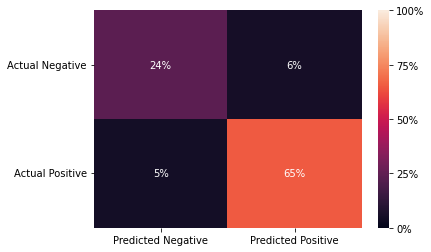

In [31]:
confusion = pd.DataFrame(confusion_matrix(X_test["Topic"], pred))
confusion = confusion.div(confusion.sum().sum())
confusion.columns = ["Predicted Negative", "Predicted Positive"]
confusion.index = ["Actual Negative", "Actual Positive"]
ax = sns.heatmap(confusion, vmin=0, vmax=1, annot=True, fmt=".0%")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.collections[0].colorbar.set_ticks((0, .25, .5, .75, 1))
ax.collections[0].colorbar.set_ticklabels(("0%", "25%", "50%", "75%", "100%"))

In [41]:
print(classification_report(X_test["Topic"], pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       116
           1       0.92      0.93      0.92       280

    accuracy                           0.89       396
   macro avg       0.87      0.87      0.87       396
weighted avg       0.89      0.89      0.89       396

